# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from pandas import DataFrame
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [117]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
weather_data = DataFrame (cities,columns=['City'])
weather_data

600


,City
0,phan thiet
1,cherskiy
2,kindersley
3,leningradskiy
4,bluff
...,...
595,namatanai
596,loikaw
597,cumaribo
598,kaspiyskiy


In [118]:
# create a empty dataframe to store data
weather_data["Lat"] = ""
weather_data["Lng"] = ""
weather_data["Max_Temp"] = ""
weather_data["Cloudiness"] = ""
weather_data["Humidity"] = ""
weather_data["Wind_Speed"] = ""
weather_data["country"] = ""
weather_data["date"] = ""
weather_data

,City,Lat,Lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,phan thiet,,,,,,,,
1,cherskiy,,,,,,,,
2,kindersley,,,,,,,,
3,leningradskiy,,,,,,,,
4,bluff,,,,,,,,
...,...,...,...,...,...,...,...,...,...
595,namatanai,,,,,,,,
596,loikaw,,,,,,,,
597,cumaribo,,,,,,,,
598,kaspiyskiy,,,,,,,,


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [123]:
# url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key + "&q="

# Loop through the cities_pd and run a lat/long search for each city
for index, row in weather_data.iterrows():
    base_url = "http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key + "&q="

    # make request
    city = row['City']
    cities_lat_lng = requests.get(base_url + city)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()
    
    try:
        weather_data.loc[index, "Lat"] = cities_lat_lng['coord']['lat']
        weather_data.loc[index, "Lng"] = cities_lat_lng['coord']['lon']
        weather_data.loc[index, "Max_Temp"] = cities_lat_lng['main']['temp_max']
        weather_data.loc[index, "Cloudiness"] = cities_lat_lng['clouds']['all']
        weather_data.loc[index, "Humidity"] = cities_lat_lng['main']['humidity']
        weather_data.loc[index, "Wind_Speed"] = cities_lat_lng['wind']['speed']
        weather_data.loc[index, "country"] = cities_lat_lng['sys']['country']
        weather_data.loc[index, "date"] = cities_lat_lng['dt']
    
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
# Visualize to confirm lat lng appear
weather_data


Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

,City,Lat,Lng,Max_Temp,Cloudiness,Humidity,Wind_Speed,country,date
0,phan thiet,10.93,108.1,297.67,89,87,1.95,VN,1603128025
1,cherskiy,68.75,161.3,265.18,55,95,2.13,RU,1603127911
2,kindersley,51.47,-109.17,267.6,37,81,5.76,CA,1603127998
3,leningradskiy,69.38,178.42,270.68,100,91,2.96,RU,1603127923
4,bluff,-46.6,168.33,282.04,72,67,7.6,NZ,1603128375
...,...,...,...,...,...,...,...,...,...
595,namatanai,-3.67,152.43,300.02,36,73,0.59,PG,1603127921
596,loikaw,19.67,97.21,290.8,93,95,0.82,MM,1603128045
597,cumaribo,,,,,,,,
598,kaspiyskiy,45.39,47.37,289.18,97,62,2.66,RU,1603127957


## Convert Raw Data to DataFrame
* Save as csv

In [128]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        600 non-null    object
 1   Lat         600 non-null    object
 2   Lng         600 non-null    object
 3   Max_Temp    600 non-null    object
 4   Cloudiness  600 non-null    object
 5   Humidity    600 non-null    object
 6   Wind_Speed  600 non-null    object
 7   country     600 non-null    object
 8   date        600 non-null    object
dtypes: object(9)
memory usage: 21.2+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

ValueError: could not convert string to float: ''

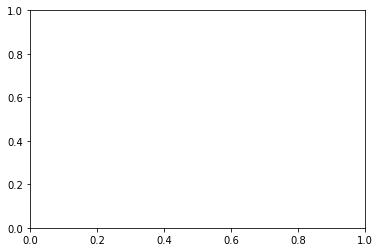

In [127]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Temperature.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has lower temperature than the Southern Hemisphere.

### Latitude vs. Humidity Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Humidity with the Southern Hemisphere.

### Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Cloudiness with the Southern Hemisphere.

### Latitude vs. Wind Speed Plot

In [ ]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind_Speed Plot")
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind_Speed.png")

# Show plot
plt.show()

## Northern Hemisphere(LAT>=0) has evenly distributed Wind Speed with the Southern Hemisphere.

## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
weather_dataN = weather_data[weather_data['lat']>=0]
weather_dataS =weather_data[weather_data['lat']<0]
weather_dataN

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values1 = weather_dataN['lat'].astype('float')
y_values1 = weather_dataN['Max_Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values1,y_values1)

# Plot regression line
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq,(30,280),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude.png")

# Show plot
plt.show()

## There is a moderate negative relaltionship between max temp and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values2 = weather_dataS['lat'].astype('float')
y_values2 = weather_dataS['Max_Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values2,y_values2)

# Plot regression line
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq,(-28,290),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude.png")

# Show plot
plt.show()

## There is a strong postive relaltionship between max temp and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values3 = weather_dataN['lat'].astype('float')
y_values3 = weather_dataN['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values3 = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values3,y_values3)

# Plot regression line
plt.plot(x_values3,regress_values3,"r-")
plt.annotate(line_eq,(50,82),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Humidity vs. Latitude.png")

# Show plot
plt.show()

## There is almost no relaltionship between Humidity (%) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values4 = weather_dataS['lat'].astype('float')
y_values4 = weather_dataS['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values4)
regress_values4 = x_values4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values4,y_values4)

# Plot regression line
plt.plot(x_values4,regress_values4,"r-")
plt.annotate(line_eq,(-28,80),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Humidity (%) and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values5 = weather_dataN['lat'].astype('float')
y_values5 = weather_dataN['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values5, y_values5)
regress_values5 = x_values5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values5,y_values5)

# Plot regression line
plt.plot(x_values5,regress_values5,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

## There is almost no relaltionship between Cloudiness (%) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values6 = weather_dataS['lat'].astype('float')
y_values6 = weather_dataS['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values6, y_values6)
regress_values6 = x_values6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values6,y_values6)

# Plot regression line
plt.plot(x_values6,regress_values6,"r-")
plt.annotate(line_eq,(-28,60),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Cloudiness (%)  and latitude in the Southern Hemisphere.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values7 = weather_dataN['lat'].astype('float')
y_values7 = weather_dataN['Wind_Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values7, y_values7)
regress_values7 = x_values7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values7,y_values7)

# Plot regression line
plt.plot(x_values7,regress_values7,"r-")
plt.annotate(line_eq,(30,3),fontsize=15,color="red")

# Label plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

## There is a little postive relaltionship between Wind Speed (mph) and latitude in the Northern Hemisphere.

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values8 = weather_dataS['lat'].astype('float')
y_values8 = weather_dataS['Wind_Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values8, y_values8)
regress_values8 = x_values8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values8, y_values8)

# Plot regression line
plt.plot(x_values8,regress_values8,"r-")
plt.annotate(line_eq,(-30,2),fontsize=15,color="red")

# Label plot
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

## There is a little negative relaltionship between Wind Speed (mph) and latitude in the Southern Hemisphere.